In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi
from scipy.special import erfc

In [2]:
# choosing parameters
np.random.seed(271)
n = 500 # number of bits
fc = 10  # carrier frequency, Hz

rb = fc/2.  # bit rate, bits/s
Tb = 1./rb
end_time = n * Tb  # s
nb = 100  # samples per bit

k = 1.5  # ratio between 2 carrier's amplitude
A = 1  # carrier's amplitude
N0 = 18  # noise power spectral density
t = Tb*np.arange(0, n, 1/nb)

In [3]:
def plot_digital(digital_signal, nlim=None, n_ticks=11):
    plt.figure(figsize=(15, 3))
    digital_signal_2 = np.concatenate((digital_signal, [digital_signal[-1]]))
    plt.step(np.arange(0, Tb*len(digital_signal_2), Tb), digital_signal_2, where='post')
    plt.xlabel('Time (second)')
    plt.ylabel('Signal')
    plt.yticks([0, 1])
    if nlim is None:
        plt.xlim(0, Tb*len(digital_signal_2)-Tb)
    else:
        plt.xlim(0, nlim*Tb)

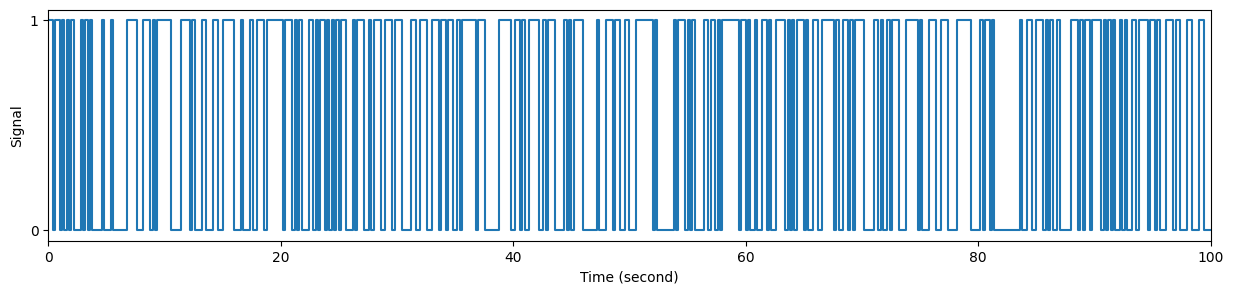

In [4]:
rand_digital_signal = np.random.randint(0, 2, n)
plot_digital(rand_digital_signal)

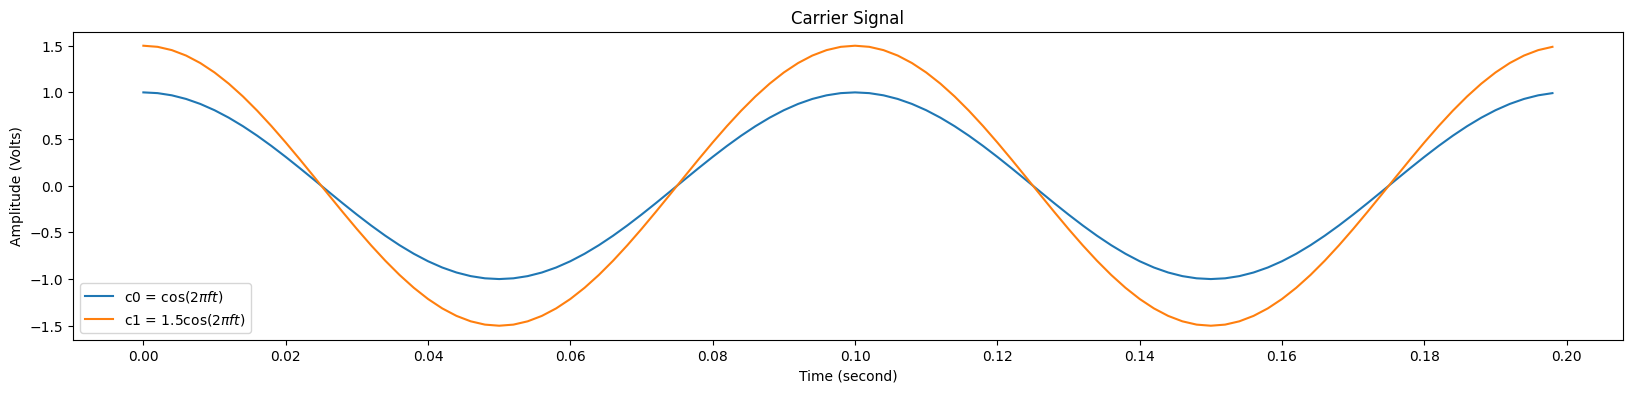

In [5]:
c0 = 1 * np.cos(2*np.pi*fc*t)        # carrier signal for binary value '0'
c1 = 1.5 * np.cos(2*np.pi*fc*t)      # carrier signal for binary value '1'
# plot the carrier signal for 1 bit period
plt.figure(figsize=(20,4))
t_  = Tb*np.arange(0,1,1/100)
plt.plot(t_,1 * np.cos(2*np.pi*fc*t_))
plt.plot(t_,1.5 * np.cos(2*np.pi*fc*t_))
plt.xlabel('Time (second)')
plt.ylabel('Amplitude (Volts)')
plt.xticks(np.arange(0,Tb+Tb/10,Tb/10))
plt.title('Carrier Signal')
plt.legend(['c0 = $\cos(2\pi ft$)','c1 = $1.5\cos(2\pi ft)$'])
plt.show()

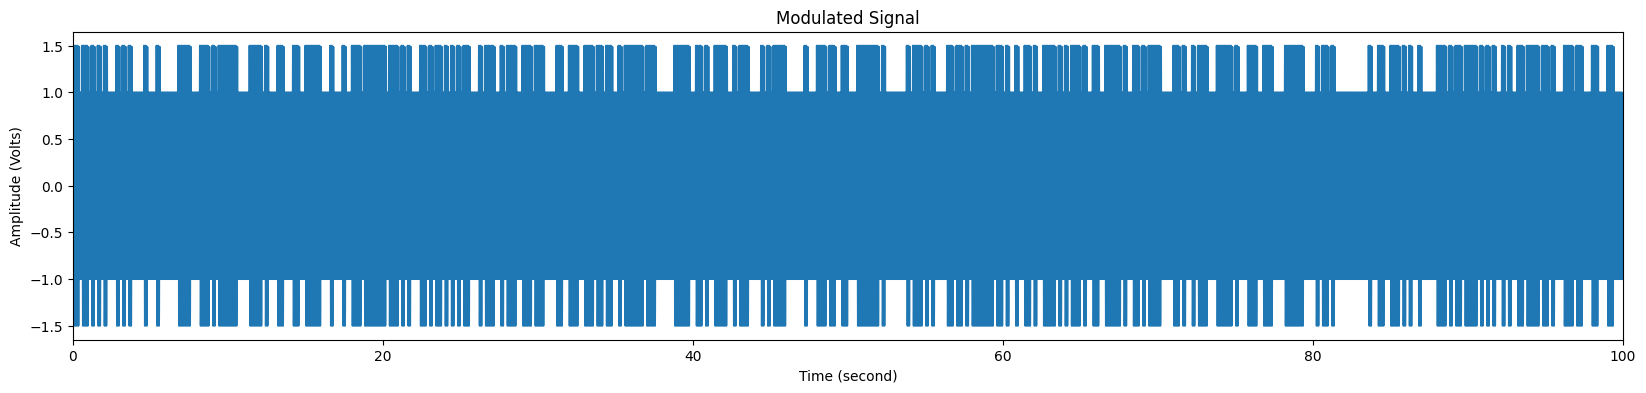

In [6]:
# perform ASK modulation
mod = np.where(rand_digital_signal.repeat(nb)==0, c0, c1)

# plot the PSK modulated signal
plt.figure(figsize=(20,4))
plt.plot(t,mod)
plt.xlabel('Time (second)')
plt.ylabel('Amplitude (Volts)')
plt.xlim(0, end_time)
plt.title('Modulated Signal')
plt.show()

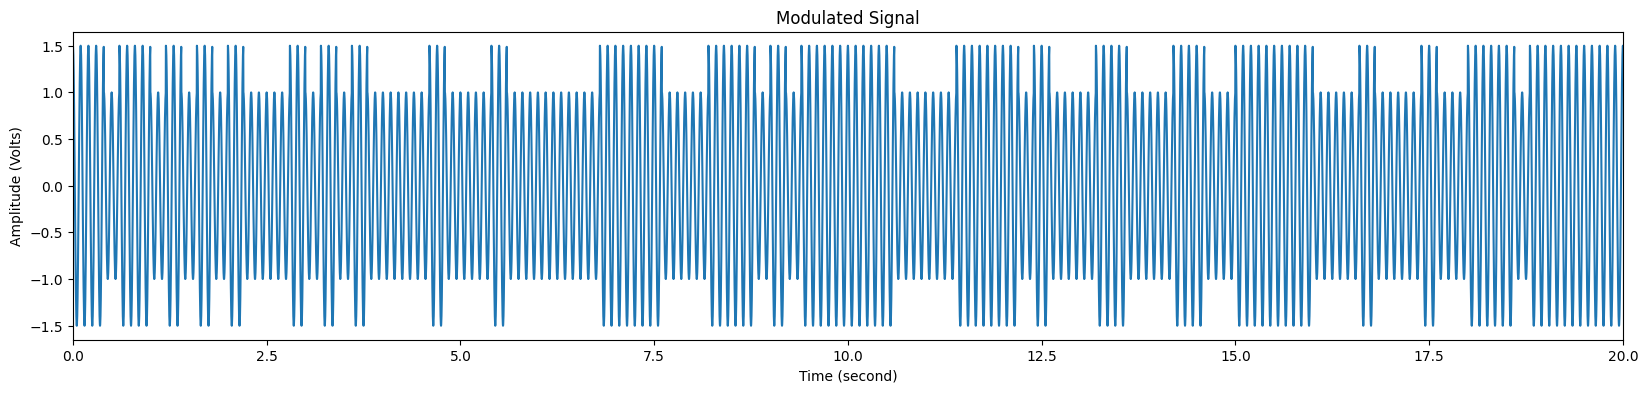

In [7]:
# plot the PSK modulated signal for first 100 bits
plt.figure(figsize=(20,4))
plt.plot(t,mod)
plt.xlabel('Time (second)')
plt.ylabel('Amplitude (Volts)')
plt.xlim(0, 100*Tb)
plt.title('Modulated Signal')
plt.show()

In [8]:
def demodulate(mod):
    demod = np.empty(shape=n, dtype=np.int_)
    for i in range(0, n*nb, nb):
        criteria0 = np.trapz((mod[i:i+nb]-c0[i:i+nb]/2)*c0[i:i+nb])
        criteria1 = np.trapz((mod[i:i+nb]-c1[i:i+nb]/2)*c1[i:i+nb])
        if criteria0 > criteria1:
            demod[i//nb] = 0
        else:
            demod[i//nb] = 1
    return demod

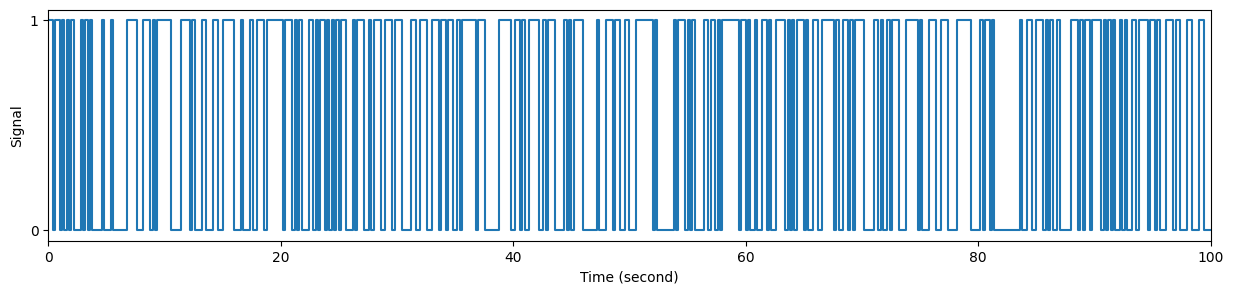

In [9]:
# demodulate the signal
demod = demodulate(mod)

# plot the demodulated binary data sequence
plot_digital(demod)

In [10]:
print('Number of different bits: ', np.abs(demod - rand_digital_signal).sum())

Number of different bits:  0


# AWGN

In [11]:
def add_awgn(mod, std):
    return mod + np.random.normal(0, std, len(mod))

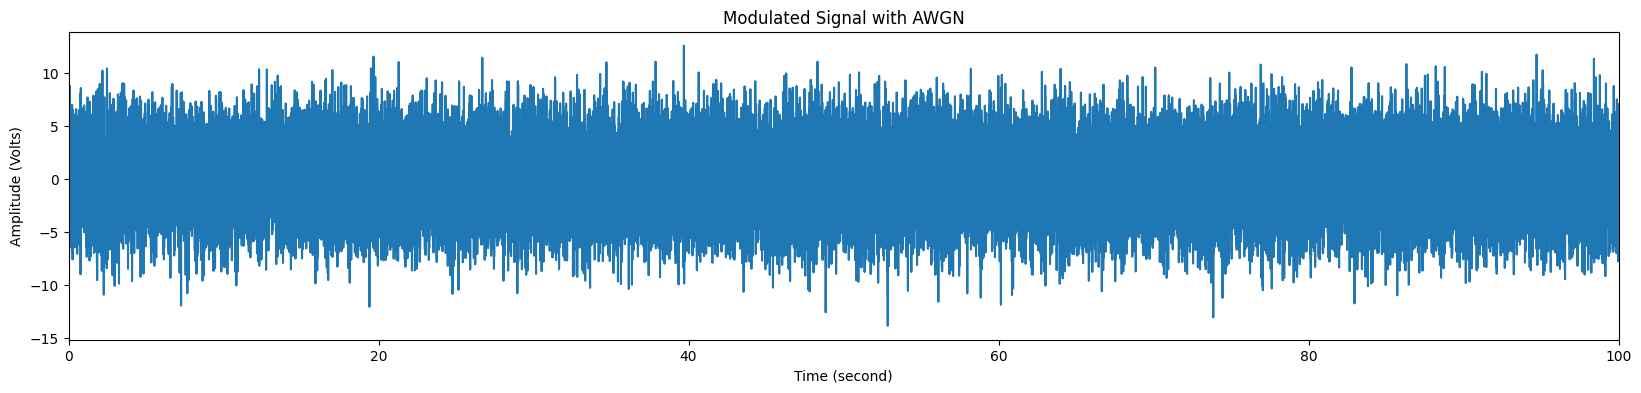

In [12]:
mod_noise = add_awgn(mod, np.sqrt(N0/2))

# plot the modulated signal with AWGN
plt.figure(figsize=(20,4))
plt.plot(t,mod_noise)
plt.xlabel('Time (second)')
plt.ylabel('Amplitude (Volts)')
plt.xlim(0, end_time)
plt.title('Modulated Signal with AWGN')
plt.show()

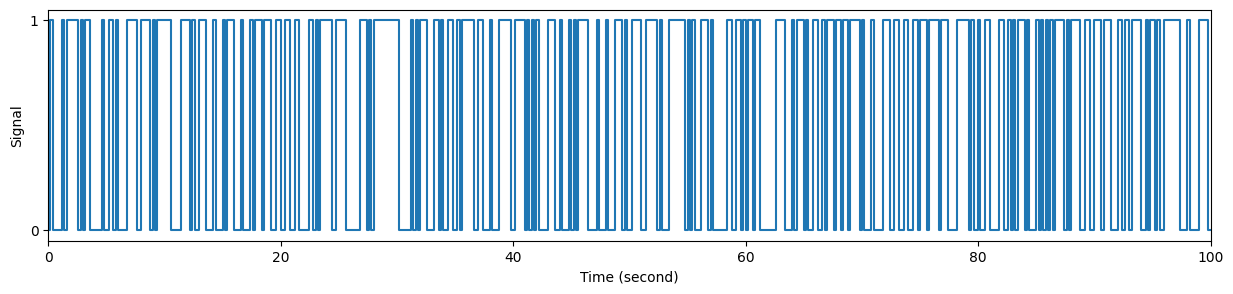

In [13]:
# demodulate the signal with AWGN
demod_noise = demodulate(mod_noise)

# plot the demodulated binary data sequence under the effect of AWGN
plot_digital(demod_noise)

In [14]:
print('Number of different bits: ', np.abs(demod_noise - rand_digital_signal).sum())

Number of different bits:  128


In [15]:
print(f"Empirical BER: {np.count_nonzero(demod_noise - rand_digital_signal) / len(rand_digital_signal)*100}%")

Empirical BER: 25.6%


In [16]:
E0 = np.trapz((c0**2)[0:nb])
E1 = np.trapz((c1**2)[0:nb])
Eb = 1/2 * (E0 + E1) # energy per bit

print('Theoretical BER: {}%'.format(np.around(100*1/2 * erfc((k-1)/np.sqrt(2*k*k+2)*np.sqrt(Eb/N0)), 5)))

Theoretical BER: 27.98187%
